# MLDL Project by Hakan Ayranci and Robert Bilger
## 1. Import Packages and data understanding/visualization

In [1]:
from data_and_visualization import *
from mldl_algorithms import *

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC

In [2]:
#Read raw data and create blind test set
raw_data_object = Data("../data/raw/train.csv")

raw_data_object.get_min_max_mean()

No. of empty values: 0
Max value of Dataset: DH69 198163000000.0
Min value of Dataset: T15 -51723.0
Mean value of Dataset: 167097885.98178184


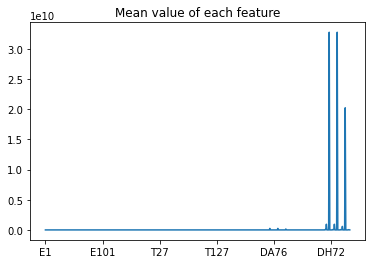

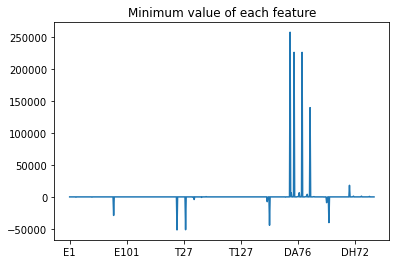

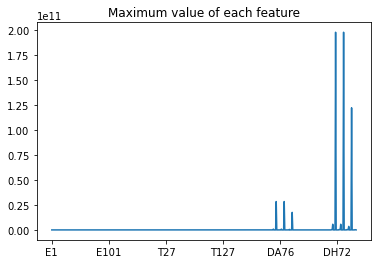

In [3]:
raw_data_object.plot_mean_values()
raw_data_object.plot_min_values()
raw_data_object.plot_max_values()

1    840
2    840
3    840
4    840
Name: class, dtype: int64


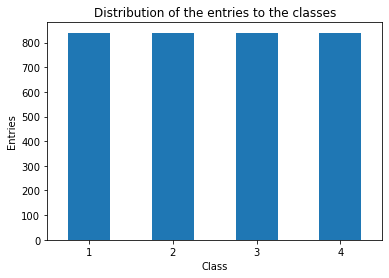

In [4]:
raw_data_object.plot_number_entries_for_class()

class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: E1, dtype: object

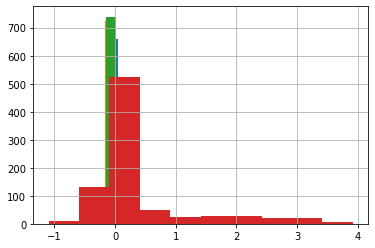

In [5]:
#Example of Histogram for feature E1 divided by classes
raw_data_object.raw_data.groupby("class")["E1"].hist()

#Example of PlotBox for feature E1 divided by classes
#raw_data_object.raw_data.groupby("class")["E1"].plot.box()

In [6]:
#Group the max values for each feature by the classes/labels
print("Max values for features by class")
print(raw_data_object.raw_data.groupby("class").max())

#Group the mean values for each feature by the classes/labels
print("Mean values for features by class")
print(raw_data_object.raw_data.groupby("class").mean())

Max values for features by class
             E1       E2        E3        E4       E5        E6       E7  \
class                                                                      
1      0.417170  2.43505  0.354800  0.213432  5.34709   44.2721  4.59967   
2      0.926043  3.78422  0.994797  2.499670  9.04522  116.3880  4.64364   
3      0.705446  3.64685  0.818780  0.800675  3.90313   41.6337  4.64364   
4      3.920770  3.98512  3.872190  4.544780  1.69174   40.8789  4.64413   

             E8        E9      E10  ...     DH95     DH96          DH97  \
class                               ...                                   
1     -0.070047 -0.017393  2.46567  ...  31.4969  1017.92  1.218930e+11   
2     -0.080614  0.351783  4.58067  ...  31.5009  1018.15  1.219090e+11   
3     -0.078047  0.037783  4.57867  ...  31.4829  1017.32  1.219050e+11   
4      3.557610  3.733610  4.54878  ...  31.5131  1018.63  1.224060e+11   

          DH98     DH99    DH100    DH101    DH102        D

### PCA for unscaled raw data

Initial numbers of features: 533
Reduced numbers of features: 1
DH69 & DH83 & DH96


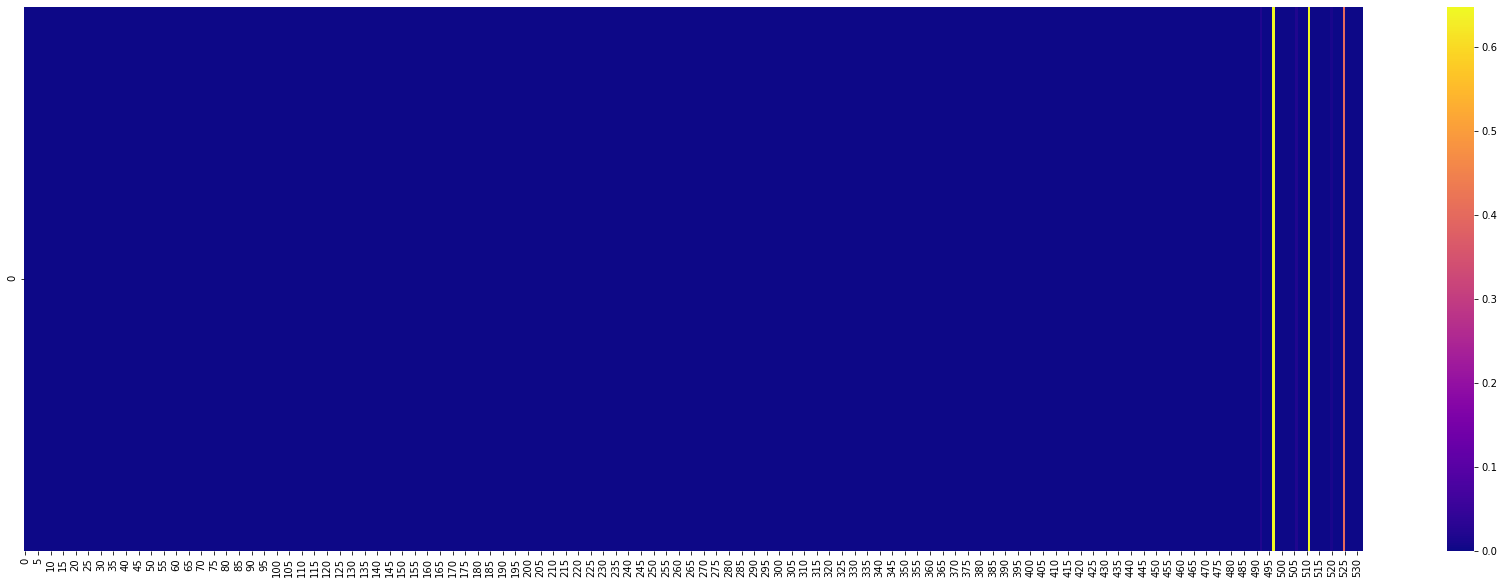

In [7]:
raw_data, raw_features, raw_labels = raw_data_object.get_data_features_labels()
#PCA for reducing features for unscaled data
# Show the no of reducedable features for 99% of variance
pca = PCA(n_components=0.99)
train_data_pca = pca.fit_transform(raw_data)

print("Initial numbers of features:", raw_data.shape[1])
print("Reduced numbers of features:", train_data_pca.shape[1])

#plt.figure(figsize=(10,6))
#plt.scatter(train_data_pca[:,0],train_data_pca[:,0],c=train_labels, cmap='plasma')

#Check which features has more of 99% of variance
#correlation = data.corr().abs()
#sorted_correlation = correlation.unstack().sort_values(kind="quicksort")
#print(sorted_correlation.head())
import seaborn as sns
plt.figure(figsize=(30,10))
sns.heatmap(pca.components_,cmap='plasma',)

#Print the features names of the headmap
print(raw_data.iloc[:, 497].name+" & "+ raw_data.iloc[:, 511].name+" & "+ raw_data.iloc[:, 524].name)

The high correlation comes from the features with the highest values. DH69 has the highest mean!!!
=>  standardization and scaling is necessary

## 2. Preprocessing

### 2.1 Train-Test Split and Scale Data

In [8]:
#raw_data_object = Data("../data/raw/train.csv")
#raw_data_object.create_blind_test_set(no_of_datarecords=10)
train_data_object = Data("../data/processed/train_dataset.csv")

data, features, labels = train_data_object.get_data_features_labels()

train_data, test_data, train_labels, test_labels = train_test_split(
data, labels, test_size = 0.33, random_state=120)

#Scale Values = StandardScaler/Z-Score
train_data_stscaled = StandardScaler().fit_transform(train_data)
test_data_stscaled = StandardScaler().fit_transform(test_data)

#Scale Values = Min-Max
train_data_min_max = MinMaxScaler().fit_transform(train_data)
test_data_min_max = MinMaxScaler().fit_transform(test_data)

In [9]:
#PCA for reducing features
# Show the no of reducedable features for 99% of variance
pca = PCA(n_components=0.99)
train_data_pca = pca.fit_transform(train_data_stscaled)

#Transform scaled test data into trained pca
test_data_pca = pca.transform(test_data_stscaled)

print("Initial numbers of features:", data.shape[1])
print("Reduced numbers of features:", train_data_pca.shape[1])

Initial numbers of features: 533
Reduced numbers of features: 100


## 3. Decision Tree
### 3.1 For unscaled Data

In [10]:
#Unscaled Data
print("Results for unscaled Data")
train_decision_tree(train_data, train_labels, test_data, test_labels)

Results for unscaled Data
### Results on test set: ###
Overall accuracy:  0.9316831683168317
Confusion matrix
[[240   1  12   0]
 [  4 243  29   0]
 [  6  14 222   0]
 [  0   0   3 236]]
Classification Report
              precision    recall  f1-score   support

           1       0.96      0.95      0.95       253
           2       0.94      0.88      0.91       276
           3       0.83      0.92      0.87       242
           4       1.00      0.99      0.99       239

    accuracy                           0.93      1010
   macro avg       0.93      0.93      0.93      1010
weighted avg       0.93      0.93      0.93      1010



NameError: name 'features' is not defined

In [20]:
kfold_decision_tree(train_data, train_labels, test_data, test_labels, 100)

Validation results
[0.72727273 0.90909091 0.72727273 1.         0.90909091 0.72727273
 0.90909091 0.81818182 0.81818182 0.90909091 1.         1.
 1.         0.8        1.         0.8        0.9        0.8
 1.         0.8        0.7        0.9        1.         0.8
 1.         0.8        0.8        0.9        0.9        0.4
 0.8        0.8        0.8        0.8        0.8        0.9
 0.9        0.9        0.9        0.9        1.         0.9
 0.8        0.8        0.9        0.7        0.6        1.
 0.9        0.9        0.9        0.8        0.9        0.9
 0.8        0.9        0.9        0.7        1.         1.
 0.9        0.8        0.9        1.         0.9        0.7
 0.9        0.8        0.8        0.8        0.9        0.8
 0.7        1.         0.8        1.         1.         0.8
 0.9        0.9        1.         0.8        0.7        0.9
 0.8        0.8        1.         0.8        0.8        0.8
 1.         0.6        0.4        0.7        0.9        0.8
 0.8        0.8  

In [21]:
train_decison_tree_only_important_features(train_data, train_labels, test_data, test_labels, 0.005)

(2050, 37)
Overall accuracy:  0.9425742574257425
Confusion matrix
[[245   0   8   0]
 [  0 248  27   1]
 [  5  14 223   0]
 [  1   1   1 236]]
Classification Report
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       253
           2       0.94      0.90      0.92       276
           3       0.86      0.92      0.89       242
           4       1.00      0.99      0.99       239

    accuracy                           0.94      1010
   macro avg       0.94      0.94      0.94      1010
weighted avg       0.94      0.94      0.94      1010



### 3.2 For scaled Data
#### 3.2.1 Standard Scaler

In [22]:
train_decision_tree(train_data_stscaled, train_labels, test_data_stscaled, test_labels)

### Results on test set: ###
Overall accuracy:  0.7960396039603961
Confusion matrix
[[239   7   7   0]
 [ 22 196  55   3]
 [ 50  60 132   0]
 [  1   0   1 237]]
Classification Report
              precision    recall  f1-score   support

           1       0.77      0.94      0.85       253
           2       0.75      0.71      0.73       276
           3       0.68      0.55      0.60       242
           4       0.99      0.99      0.99       239

    accuracy                           0.80      1010
   macro avg       0.79      0.80      0.79      1010
weighted avg       0.79      0.80      0.79      1010



NameError: name 'features' is not defined

In [23]:
kfold_decision_tree(train_data_stscaled, train_labels, test_data_stscaled, test_labels, 100)

Validation results
[0.81818182 0.90909091 0.81818182 1.         0.90909091 0.72727273
 0.90909091 0.63636364 0.90909091 0.90909091 0.8        0.9
 1.         0.9        0.9        0.9        1.         0.7
 0.9        0.7        0.8        0.9        1.         0.8
 1.         0.9        0.8        0.9        0.8        0.4
 0.9        0.8        0.8        0.8        0.8        1.
 1.         0.9        0.9        0.9        1.         0.9
 0.8        0.8        0.9        0.7        0.6        0.9
 1.         0.8        0.9        0.9        0.9        0.9
 0.8        0.8        1.         0.7        1.         1.
 0.9        0.9        0.7        0.9        0.8        0.7
 0.8        0.8        0.9        0.8        1.         0.8
 0.8        1.         0.8        0.9        1.         0.8
 0.9        0.9        1.         0.9        1.         0.9
 0.7        0.8        0.9        0.7        0.8        0.8
 1.         0.6        0.3        0.7        0.9        0.8
 0.7        0.9 

## 4. Random Forest
### 4.1 For unscaled Data

In [24]:
train_random_forest(train_data, train_labels, test_data, test_labels)

Overall accuracy:  0.9871287128712871
Confusion matrix
[[249   3   1   0]
 [  0 268   8   0]
 [  0   1 241   0]
 [  0   0   0 239]]
Classification Report
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       253
           2       0.99      0.97      0.98       276
           3       0.96      1.00      0.98       242
           4       1.00      1.00      1.00       239

    accuracy                           0.99      1010
   macro avg       0.99      0.99      0.99      1010
weighted avg       0.99      0.99      0.99      1010



In [25]:
kfold_random_forest(train_data, train_labels, test_data, test_labels, 100)

Validation results
[0.81818182 1.         0.72727273 1.         0.90909091 0.72727273
 1.         0.90909091 0.90909091 0.90909091 0.9        1.
 0.9        1.         1.         1.         1.         0.9
 1.         1.         1.         0.8        1.         1.
 0.9        1.         1.         1.         0.8        0.8
 1.         0.9        1.         1.         0.9        1.
 1.         1.         1.         0.9        1.         1.
 0.8        0.9        1.         0.9        0.9        0.9
 0.9        0.9        0.9        1.         1.         1.
 1.         1.         1.         1.         0.9        1.
 0.9        1.         1.         1.         0.8        0.7
 1.         1.         1.         0.9        0.9        1.
 0.9        1.         1.         1.         1.         0.9
 0.9        0.9        0.9        1.         0.6        1.
 0.8        1.         0.9        1.         1.         1.
 1.         0.8        0.8        0.8        1.         1.
 1.         1.         0

['T13', 'E69', 'T28', 'E75', 'E76', 'E51', 'E77', 'E67', 'E46', 'E45', 'E70', 'E62', 'T43', 'T60', 'T88', 'T22', 'T49', 'T74', 'E18', 'T2', 'E24', 'T7', 'E25', 'T102', 'T56', 'T132', 'T144', 'T89', 'T116', 'T90', 'E52', 'E73', 'T17', 'T100', 'DH28', 'T44', 'T40', 'T58', 'E78', 'T50', 'T95', 'T81', 'T53', 'T14', 'E23', 'T55', 'T99', 'T130', 'E54', 'T31', 'T30', 'T54', 'T98', 'T15', 'E43', 'E26', 'T78', 'T32', 'T77', 'T143', 'T29', 'T16', 'E15', 'T1', 'T47', 'E53', 'DA28', 'T62', 'T45', 'T85', 'T48', 'T137', 'T10', 'T84', 'E74', 'T104', 'T131', 'T25', 'T46', 'T97', 'T67', 'T101', 'T92', 'T105', 'T75', 'T83', 'T52', 'T117', 'T150', 'E36', 'E10', 'T114', 'T115', 'T129', 'E108', 'T142', 'T26', 'E136', 'E122', 'E14', 'E94', 'DH24', 'E164', 'E5', 'T57', 'T8', 'E6', 'T37', 'E37', 'E56', 'DH14', 'T9', 'E80', 'E39', 'T27', 'E30', 'T24', 'T11', 'T73', 'DA90', 'E2', 'E11', 'T41', 'T33', 'T23', 'E41', 'T34', 'T19', 'E150', 'T151', 'E13', 'DH56', 'T76', 'E28', 'E44', 'DH79', 'T111', 'T103', 'T91', '

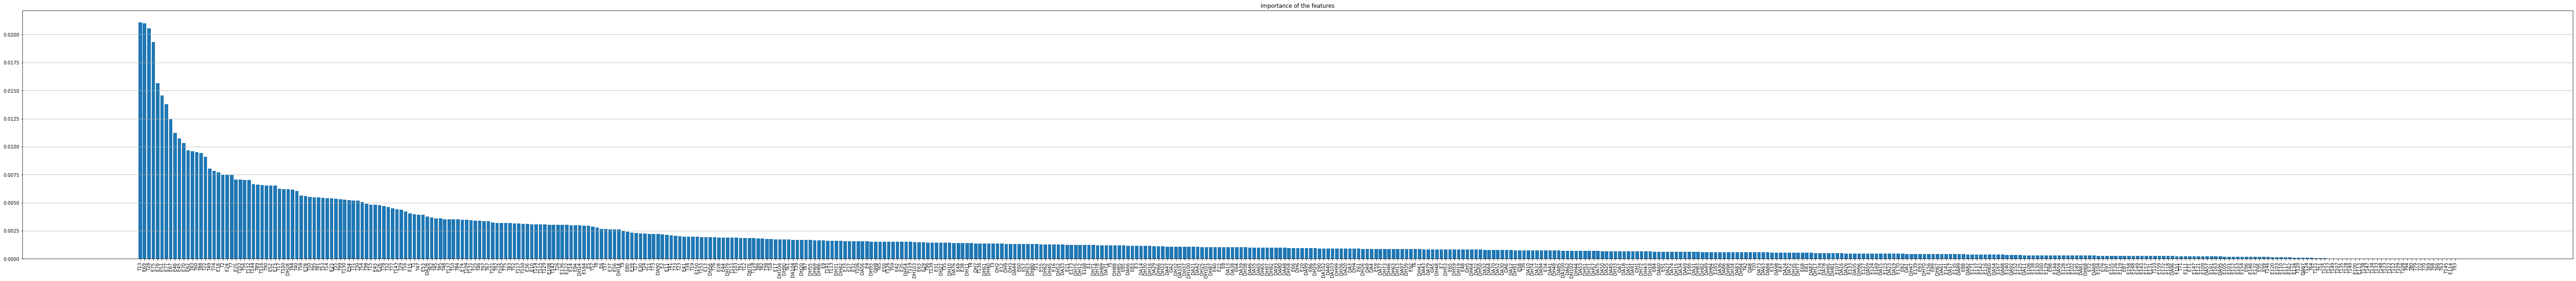

<Figure size 432x288 with 0 Axes>

In [26]:
importance_of_features_random_forest(train_data, train_labels, test_data, test_labels)

In [28]:
train_random_forest_only_important_features(train_data, train_labels, test_data, test_labels, 0.001)

(2050, 257)
Overall accuracy:  0.9910891089108911
Confusion matrix
[[249   3   1   0]
 [  0 271   5   0]
 [  0   0 242   0]
 [  0   0   0 239]]
Classification Report
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       253
           2       0.99      0.98      0.99       276
           3       0.98      1.00      0.99       242
           4       1.00      1.00      1.00       239

    accuracy                           0.99      1010
   macro avg       0.99      0.99      0.99      1010
weighted avg       0.99      0.99      0.99      1010



### 4.2 For scaled Data
#### 4.2.1 Standard Scaler

In [6]:
train_random_forest(train_data_stscaled, train_labels, test_data_stscaled, test_labels)

Overall accuracy:  0.4801980198019802
Confusion matrix
[[253   0   0   0]
 [271   5   0   0]
 [241   0   1   0]
 [ 12   0   1 226]]
Classification Report
              precision    recall  f1-score   support

           1       0.33      1.00      0.49       253
           2       1.00      0.02      0.04       276
           3       0.50      0.00      0.01       242
           4       1.00      0.95      0.97       239

    accuracy                           0.48      1010
   macro avg       0.71      0.49      0.38      1010
weighted avg       0.71      0.48      0.36      1010



In [7]:
kfold_random_forest(train_data_stscaled, train_labels, test_data_stscaled, test_labels, 100)

Validation results
[0.81818182 1.         0.81818182 1.         0.81818182 0.72727273
 1.         0.90909091 0.90909091 0.90909091 0.9        0.9
 0.9        1.         1.         1.         1.         0.8
 1.         1.         1.         0.8        1.         1.
 1.         1.         1.         1.         0.8        0.8
 1.         0.9        1.         0.9        0.9        1.
 1.         1.         1.         0.9        1.         0.9
 0.9        0.9        1.         0.9        0.9        1.
 0.9        0.9        0.9        1.         1.         1.
 1.         1.         1.         1.         0.9        1.
 0.9        1.         1.         1.         0.8        0.7
 1.         1.         1.         0.9        0.9        1.
 0.8        1.         0.9        1.         1.         0.9
 1.         0.9        0.9        1.         0.6        1.
 0.8        1.         0.9        0.9        0.9        1.
 1.         0.8        0.9        0.8        1.         1.
 1.         1.         

## 5. Support Verctor Machine
### 5.1 For scaled Data

In [9]:
model = SVC(kernel = "linear", C=1)

# train model on training set
model.fit(train_data_stscaled, train_labels)

kf = KFold(n_splits=100, shuffle=True, random_state=1)
# Perform k-fold cross-validation
validation_results = cross_val_score(model,test_data_stscaled, test_labels, cv=kf, scoring="accuracy",n_jobs=-1) 
    
#Validation Results
print("Validation results")
print(validation_results)

# Mean of validation
print("Mean accuracy")
print(validation_results.mean())

Validation results
[0.72727273 0.90909091 0.81818182 1.         0.90909091 0.72727273
 0.81818182 0.72727273 0.72727273 0.81818182 0.9        0.8
 0.8        0.9        0.9        1.         0.9        0.9
 1.         1.         0.8        0.8        0.9        0.7
 1.         0.9        0.9        1.         0.9        0.7
 0.7        1.         0.9        0.9        1.         0.8
 1.         1.         1.         1.         0.9        0.8
 0.6        0.8        0.8        0.8        0.9        0.8
 0.7        0.9        1.         0.7        0.8        0.9
 0.8        1.         0.8        0.8        0.9        0.8
 0.9        0.9        0.7        0.9        0.9        0.9
 0.9        0.8        0.9        0.7        0.9        0.9
 0.9        0.8        0.7        1.         0.9        0.8
 0.9        0.8        1.         0.9        0.8        1.
 0.6        0.7        0.7        0.9        1.         0.8
 0.9        0.6        0.7        0.5        0.9        0.7
 0.9        1. 

In [8]:
model = SVC(kernel = "linear", C=1)

# train model on training set
model.fit(train_data_stscaled, train_labels)

predictions = model.predict(test_data_stscaled)
print("### Results on test set: ###")

acc = accuracy_score(test_labels, predictions)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(test_labels, predictions)
print(cm)

print("Classification Report")
cr = classification_report(test_labels, predictions)
print(cr)

### Results on test set: ###
Overall accuracy:  0.8801980198019802
Confusion matrix
[[240   0  13   0]
 [  6 214  56   0]
 [ 13  33 196   0]
 [  0   0   0 239]]
Classification Report
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       253
           2       0.87      0.78      0.82       276
           3       0.74      0.81      0.77       242
           4       1.00      1.00      1.00       239

    accuracy                           0.88      1010
   macro avg       0.88      0.88      0.88      1010
weighted avg       0.88      0.88      0.88      1010



## 6. Neuronal Network

### Version 1

In [29]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint


np.random.seed(0)
number_of_features = 533

tokenizer = Tokenizer(num_words=number_of_features)
features_train = np.asmatrix(train_data_stscaled)
features_test = np.asmatrix(test_data_stscaled)


target_train = to_categorical(train_labels.to_numpy()-1, num_classes=4)
target_test = to_categorical(test_labels.to_numpy()-1, num_classes=4)

network = models.Sequential()

network.add(layers.Dense(units=100,activation="relu",input_shape=(number_of_features,)))

network.add(layers.Dense(units=250, activation="relu"))

network.add(layers.Dense(units=4, activation="softmax"))
#network.add(layers.Dense(units=4, activation="sigmoid"))

network.compile(loss="categorical_crossentropy", # Kreuzentropie
optimizer="rmsprop", # Root Mean Square Propagation
metrics=["accuracy"]) # Performancemetrik Genauigkeit
print(features_train.shape)
print(target_train.shape)
print(target_train)

# Callback-Funktionen einrichten, um Training frühzeitig zu stoppen und das
# bislang beste Modell zu speichern
callbacks = [EarlyStopping(monitor="val_loss", patience=50),
ModelCheckpoint(filepath="best_model.h5",
monitor="val_loss",
save_best_only=True)]

# Neuronales Netz trainieren
history = network.fit(features_train, # Merkmale
target_train, # Ziel
epochs=100,
callbacks=callbacks,
verbose=0, # Keine Ausgabe
batch_size=30, # Anzahl der Beobachtungen pro Batch
validation_data=(features_test, target_test)) # Testdaten

(2050, 533)
(2050, 4)
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [30]:
predicted_target = network.predict(features_test)
predicted_target[800].round()
blind_test_value = raw_data
#blind_test_value.pop('class')
blind_test_value = StandardScaler().fit_transform(blind_test_value)

#print(blind_test_value[3000])
blind_test_v = np.asmatrix(blind_test_value[307])
predicted_target = network.predict(blind_test_v)
predicted_target.round()

array([[0., 1., 0., 0.]], dtype=float32)

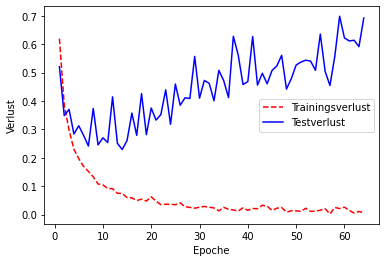

In [31]:
# Die Verläufe von Trainings- und Testverlusten abrufen
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# Zähler für die Anzahl der Epochen erstellen
epoch_count = range(1, len(training_loss) + 1)

# Verlustverlauf visualisieren
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Trainingsverlust", "Testverlust"])
plt.xlabel("Epoche")
plt.ylabel("Verlust")
plt.show()

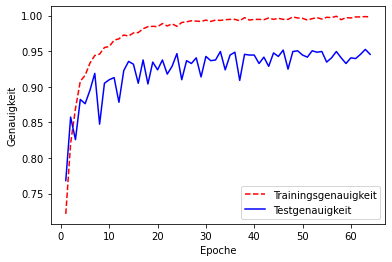

In [32]:
# Verläufe von Trainings- und Testgenauigkeit abrufen
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
# Genauigkeitsverlauf visualisieren
plt.legend(["Trainingsgenauigkeit", "Testgenauigkeit"])
plt.xlabel("Epoche")
plt.ylabel("Genauigkeit")
fig1 = plt.gcf()
plt.show()
#plt.draw()
#fig1.savefig('Neuronales_Netz_Genauigkeit.png', dpi=100)

### Version 2

In [33]:
#Changing parameter 
#alpha helps overfitting
alpha_value = 1e-5
#f.e. 0.001; 0.1; 10
#Hidden_layer_sizes
layers = (5,2)

In [34]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver ='lbfgs', alpha = alpha_value, hidden_layer_sizes=layers, random_state=1)
classes = [1,2,3,4]
clf.fit(train_data_stscaled, train_labels)
predictions = clf.predict(test_data_stscaled)

In [35]:
#predictions = clf.predict(test_data_stscaled)
print("### Results on test set: ###")

acc = accuracy_score(test_labels, predictions)
print("Overall accuracy: ", acc)

print("Confusion matrix")
cm = confusion_matrix(test_labels, predictions)
print(cm)

print("Classification Report")
cr = classification_report(test_labels, predictions)
print(cr)

### Results on test set: ###
Overall accuracy:  0.7336633663366336
Confusion matrix
[[247   0   6   0]
 [  6 130 135   5]
 [ 62  51 129   0]
 [  1   0   3 235]]
Classification Report
              precision    recall  f1-score   support

           1       0.78      0.98      0.87       253
           2       0.72      0.47      0.57       276
           3       0.47      0.53      0.50       242
           4       0.98      0.98      0.98       239

    accuracy                           0.73      1010
   macro avg       0.74      0.74      0.73      1010
weighted avg       0.74      0.73      0.73      1010



In [36]:
from sklearn.neural_network import MLPRegressor
rlf = MLPRegressor(solver ='lbfgs', alpha = alpha_value, hidden_layer_sizes=layers, random_state=1)
classes = [1,2,3,4]
rlf.fit(train_data_stscaled, train_labels)
predictions = rlf.predict(test_data_stscaled)
#https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
#Array has not class values but varing values (like 1.2 etc) so we need to round the results
predictions = np.round(predictions, 0)